# CASE STUDY : APPLE STOCK PRICE PREDICTION FOR FORECASTING THE LONG TERM INVESTMENT GROWTH

1. IMPORTING BASIC LIBRARIES
2. LOADING THE DATA THROUGH YAHOO FINANCE API
3. DATA TRANSFORMATION USING VARIOUS TECHNIQUE FOR CREATING DATA AS STATIONARY
    * LOG TRANSFORMATION
    * LOG SCALE MINUS MOVING AVERAGE
    * EXPONENTIAL DECAY WEIGHTED AVERAGE
    * LOG SCALE MINUS LOG SCALE SHIFT
4. TRAIN TEST SPLIT
5. TRAINING ARIMA MODEL WITH NON - STATIONARY DATA
6. TRAINING 2nd ORDER EXPONENTIAL SMOOTHING MODEL WITH NON - STATIONARY DATA
7. TRAINING ARIMA MODEL WITH STATIONARY DATA


# Importing the dependent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
import yfinance as yf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

# Extracting and loading the data from yahoo finance

In [2]:
df = yf.download('AAPL','2010-01-01','2022-12-09')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


# Exploratory Data Analysis

In [3]:
df.shape

(3257, 6)

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300


In [5]:
df1 = df.copy()
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [6]:
df1 = df1.drop(['High','Low','Open','Volume','Adj Close'], axis=1)

In [7]:
df1.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [8]:
df1.Close.min(),df1.Close.max()

(6.85892915725708, 182.00999450683594)

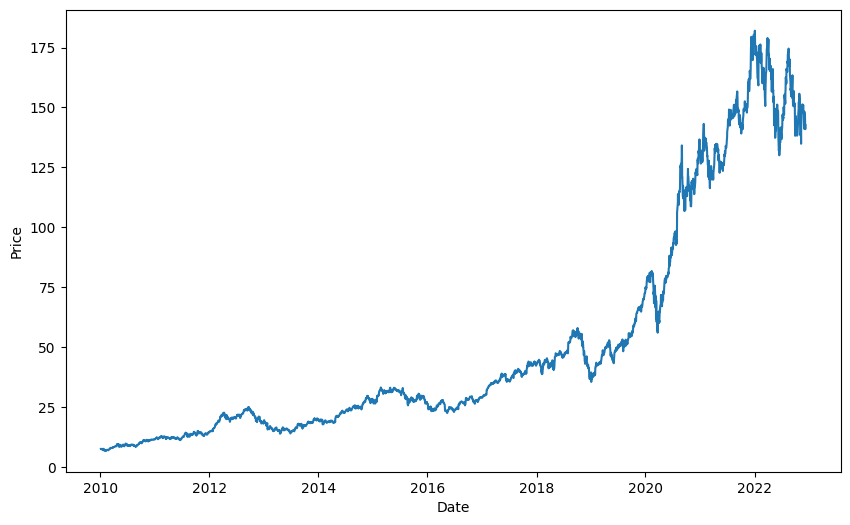

In [9]:
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df1.Close)

In [10]:
df1.isnull().sum()

Close    0
dtype: int64

In [11]:
y = df1['Close'].resample('W').mean()
y

Date
2010-01-10      7.585143
2010-01-17      7.456000
2010-01-24      7.433839
2010-01-31      7.201714
2010-02-07      6.980929
                 ...    
2022-11-13    141.971997
2022-11-20    149.823996
2022-11-27    149.342499
2022-12-04    145.907999
2022-12-11    143.282501
Freq: W-SUN, Name: Close, Length: 675, dtype: float64

In [12]:
y.min(),y.max()

(6.980928516387939, 178.9540008544922)

Text(0.5, 1.0, 'APPLE STOCK PRICE')

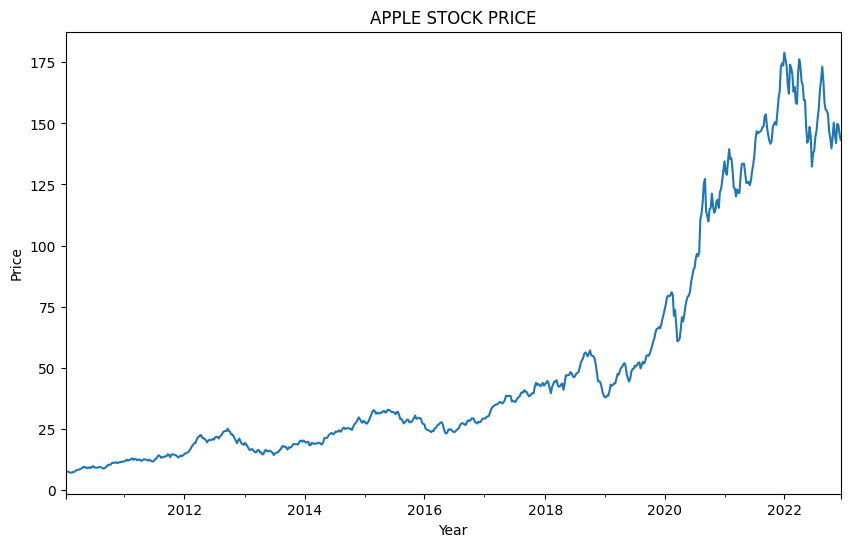

In [13]:
y.plot()
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('APPLE STOCK PRICE')

In [14]:
#Rolling Statistics
rolmean = y.rolling(window=12).mean()
rolstd = y.rolling(window=12).std()
print(rolmean,rolstd)

Date
2010-01-10           NaN
2010-01-17           NaN
2010-01-24           NaN
2010-01-31           NaN
2010-02-07           NaN
                 ...    
2022-11-13    150.170166
2022-11-20    148.722499
2022-11-27    147.979707
2022-12-04    147.173707
2022-12-11    146.186416
Freq: W-SUN, Name: Close, Length: 675, dtype: float64 Date
2010-01-10         NaN
2010-01-17         NaN
2010-01-24         NaN
2010-01-31         NaN
2010-02-07         NaN
                ...   
2022-11-13    8.009880
2022-11-20    5.960719
2022-11-27    5.167272
2022-12-04    4.596832
2022-12-11    3.960963
Freq: W-SUN, Name: Close, Length: 675, dtype: float64


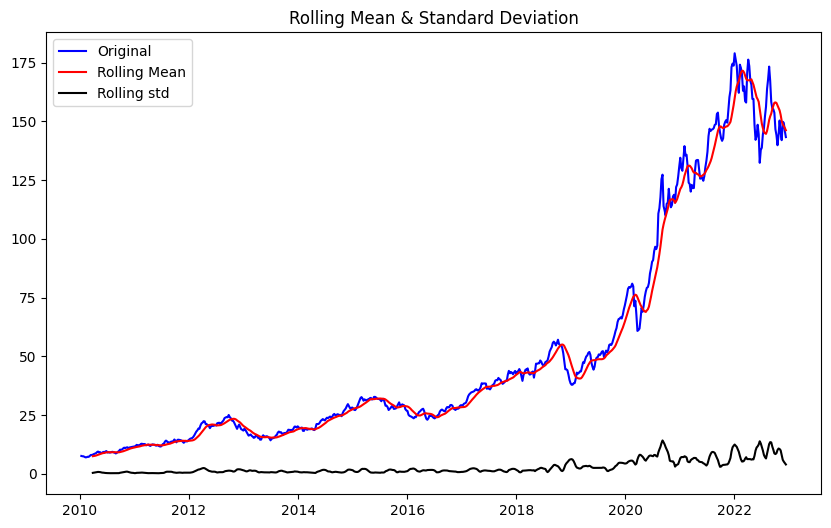

In [15]:
orig = plt.plot(y,color='blue',label="Original")
mean = plt.plot(rolmean,color='red',label="Rolling Mean")
std = plt.plot(rolstd, color='black',label="Rolling std")
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)

# ADF test for checking the stationarity of data

Ho : Data is stationary
Ha : Data is non - stationary

In [16]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey fuller Test:')
dftest = adfuller(y.values, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags used', 'Number of Observation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey fuller Test:
Test Statistics                 0.510211
p-value                         0.985180
#Lags used                     19.000000
Number of Observation Used    655.000000
Critical Value (1%)            -3.440373
Critical Value (5%)            -2.865963
Critical Value (10%)           -2.569125
dtype: float64


As per the above table p-value is greater than 0.05(CF), so here we will reject the null hypothesis and accept alternate hypothesis

## Log Transformation for converting the data from non - stationary to stationary. 

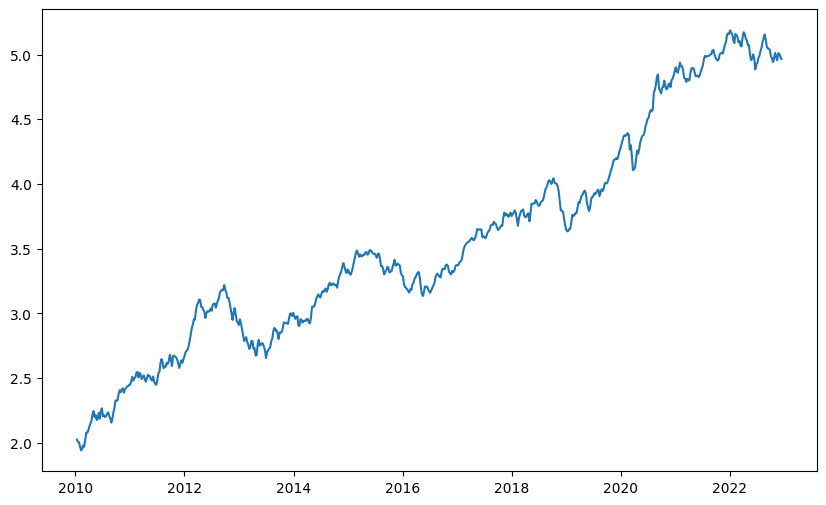

In [17]:
y_logScale = np.log(y)
plt.plot(y_logScale)

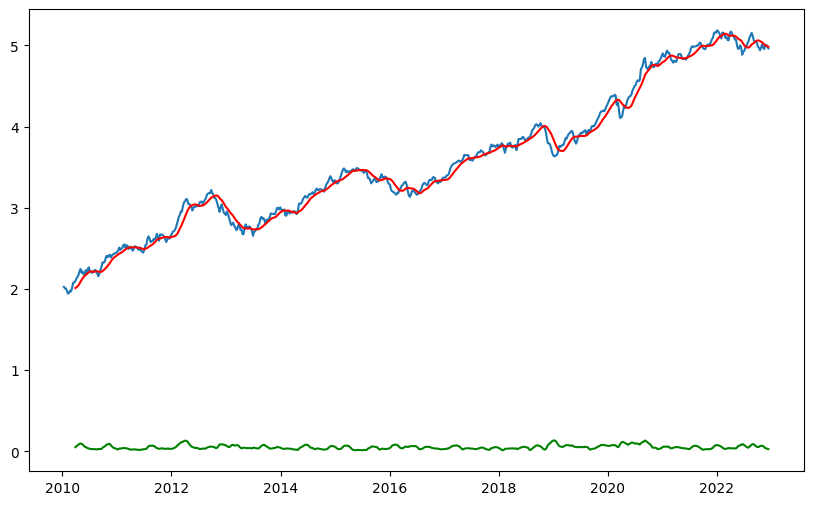

In [18]:
#Rolling Statistics
movingAverage = y_logScale.rolling(window=12).mean()
movingSTD = y_logScale.rolling(window=12).std()

plt.plot(y_logScale)
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='green')

# Data tranformation by subtracting log transform value - log transform movingAverage

In [19]:
datasetLogScaleMinusMovingAverage = y_logScale - movingAverage
datasetLogScaleMinusMovingAverage

Date
2010-01-10         NaN
2010-01-17         NaN
2010-01-24         NaN
2010-01-31         NaN
2010-02-07         NaN
                ...   
2022-11-13   -0.054860
2022-11-20    0.008114
2022-11-27    0.009726
2022-12-04   -0.008192
2022-12-11   -0.019729
Freq: W-SUN, Name: Close, Length: 675, dtype: float64

In [20]:
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

Date
2010-03-28    0.085895
2010-04-04    0.106906
2010-04-11    0.117465
2010-04-18    0.125485
2010-04-25    0.153945
2010-05-02    0.155290
2010-05-09    0.088310
2010-05-16    0.085514
2010-05-23    0.028804
2010-05-30    0.024185
Freq: W-SUN, Name: Close, dtype: float64

In [21]:
datasetLogScaleMinusMovingAverage.shape

(664,)

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=50).mean()
    movingSTD = timeseries.rolling(window=50).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perfrom Dickey-Fuller test:
    print('Results of Dickey fuller Test:')
    dftest = adfuller(timeseries.values, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags used', 'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
    

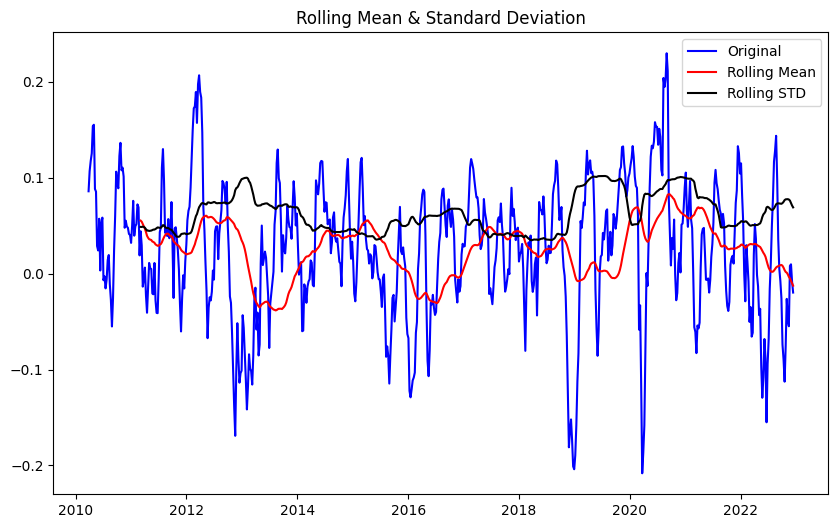

Results of Dickey fuller Test:
Test Statistics              -8.090953e+00
p-value                       1.378765e-12
#Lags used                    4.000000e+00
Number of Observation Used    6.590000e+02
Critical Value (1%)          -3.440312e+00
Critical Value (5%)          -2.865936e+00
Critical Value (10%)         -2.569111e+00
dtype: float64


In [23]:
test_stationarity(datasetLogScaleMinusMovingAverage)

As per the above table p-value is lesser than 0.05(CF), so here we will accept the null hypothesis and reject the alternate hypothesis

# Data transformation using exponential Decay Weighted Average

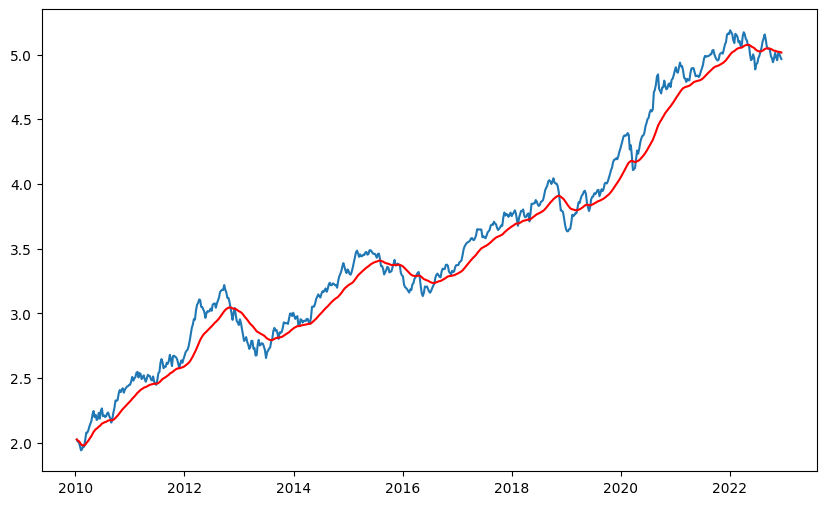

In [24]:
exponentialDecayWeightedAverage = y_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(y_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

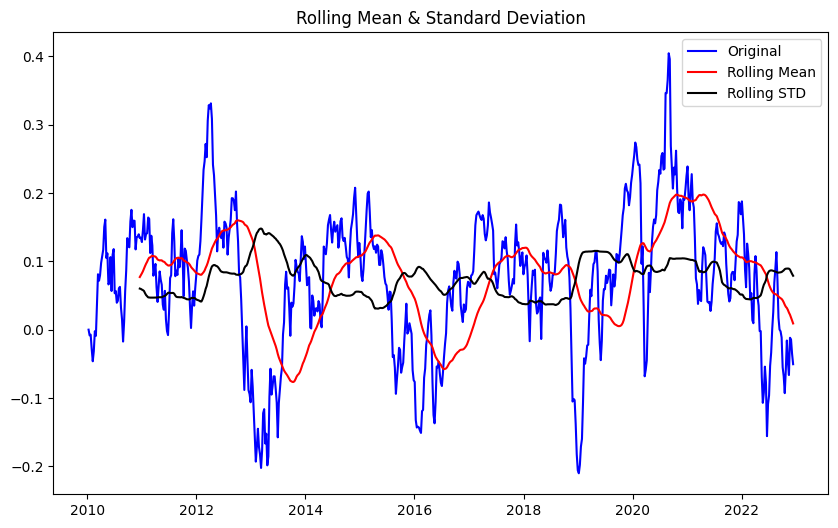

Results of Dickey fuller Test:
Test Statistics                -4.758194
p-value                         0.000065
#Lags used                      3.000000
Number of Observation Used    671.000000
Critical Value (1%)            -3.440133
Critical Value (5%)            -2.865857
Critical Value (10%)           -2.569069
dtype: float64


In [25]:
datasetLogScaleMinusMovingExponentialDecayAverage = y_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

As per the above table p-value is lesser than 0.05(CF), so here we will accept the null hypothesis and reject the alternate hypothesis

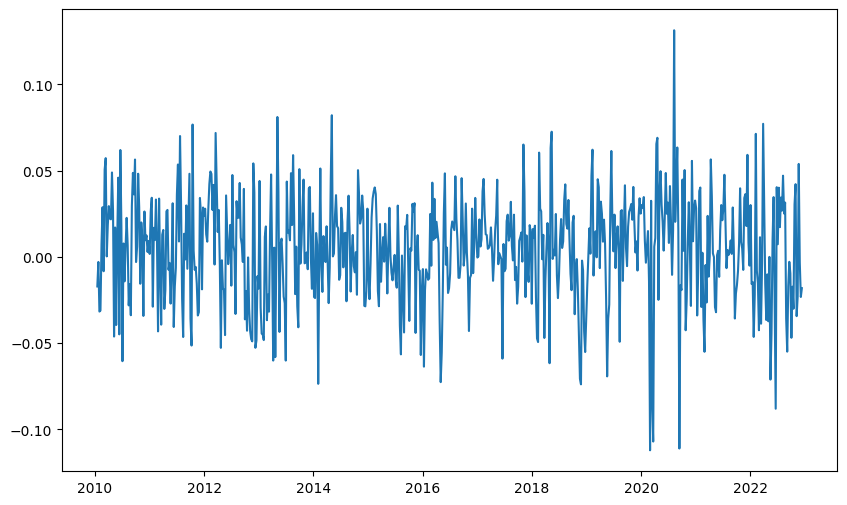

In [26]:
datasetLogDiffShifting = y_logScale - y_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [27]:
datasetLogDiffShifting.dropna(inplace=True)


In [28]:
y_logScale.shift()

Date
2010-01-10         NaN
2010-01-17    2.026191
2010-01-24    2.009019
2010-01-31    2.006042
2010-02-07    1.974319
                ...   
2022-11-13    4.978498
2022-11-20    4.955630
2022-11-27    5.009461
2022-12-04    5.006242
2022-12-11    4.982976
Freq: W-SUN, Name: Close, Length: 675, dtype: float64

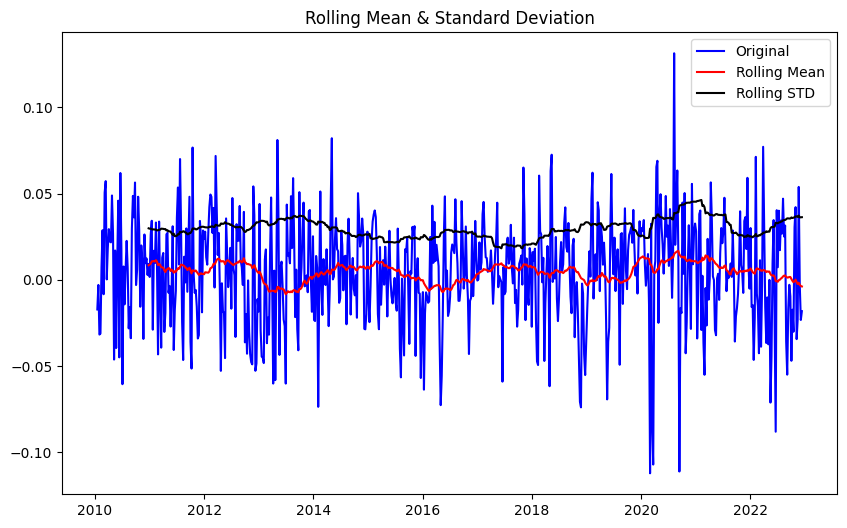

Results of Dickey fuller Test:
Test Statistics              -1.278866e+01
p-value                       7.155275e-24
#Lags used                    2.000000e+00
Number of Observation Used    6.710000e+02
Critical Value (1%)          -3.440133e+00
Critical Value (5%)          -2.865857e+00
Critical Value (10%)         -2.569069e+00
dtype: float64


In [29]:
test_stationarity(datasetLogDiffShifting)

As per the above table p-value is lesser than 0.05(CF), so here we will accept the null hypothesis and reject the alternate hypothesis

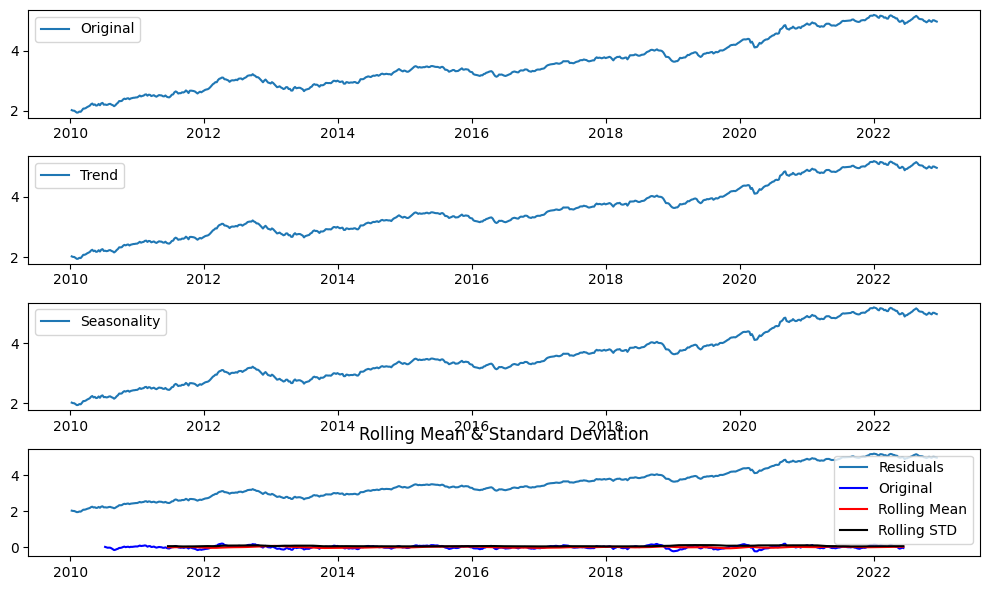

Results of Dickey fuller Test:
Test Statistics              -7.287696e+00
p-value                       1.444314e-10
#Lags used                    6.000000e+00
Number of Observation Used    6.160000e+02
Critical Value (1%)          -3.441010e+00
Critical Value (5%)          -2.866243e+00
Critical Value (10%)         -2.569275e+00
dtype: float64


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(y_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(y_logScale, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(y_logScale, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(y_logScale, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

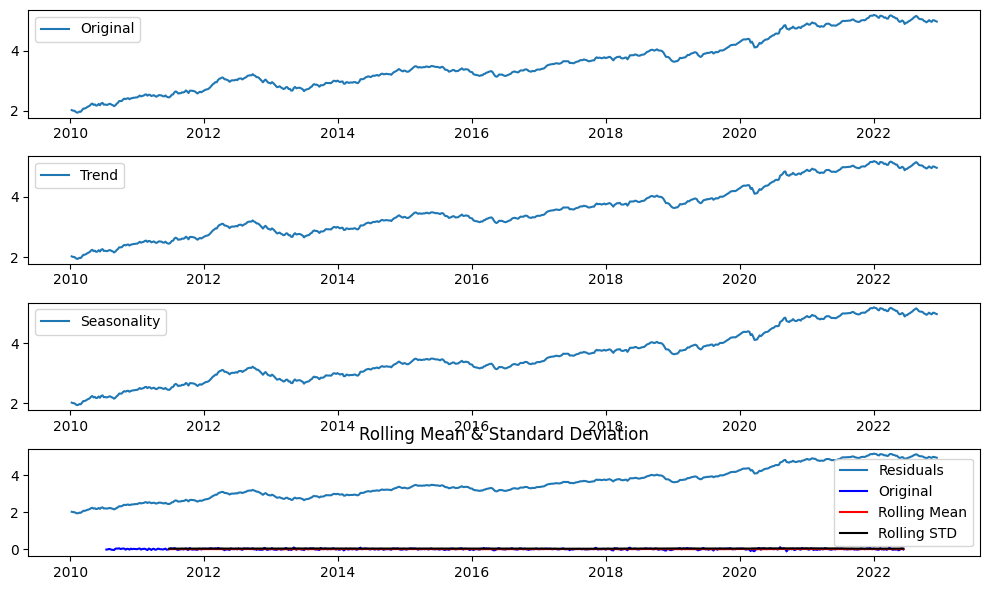

Results of Dickey fuller Test:
Test Statistics              -8.773569e+00
p-value                       2.483344e-14
#Lags used                    1.800000e+01
Number of Observation Used    6.030000e+02
Critical Value (1%)          -3.441241e+00
Critical Value (5%)          -2.866345e+00
Critical Value (10%)         -2.569329e+00
dtype: float64


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(datasetLogDiffShifting)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(y_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(y_logScale, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(y_logScale, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(y_logScale, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

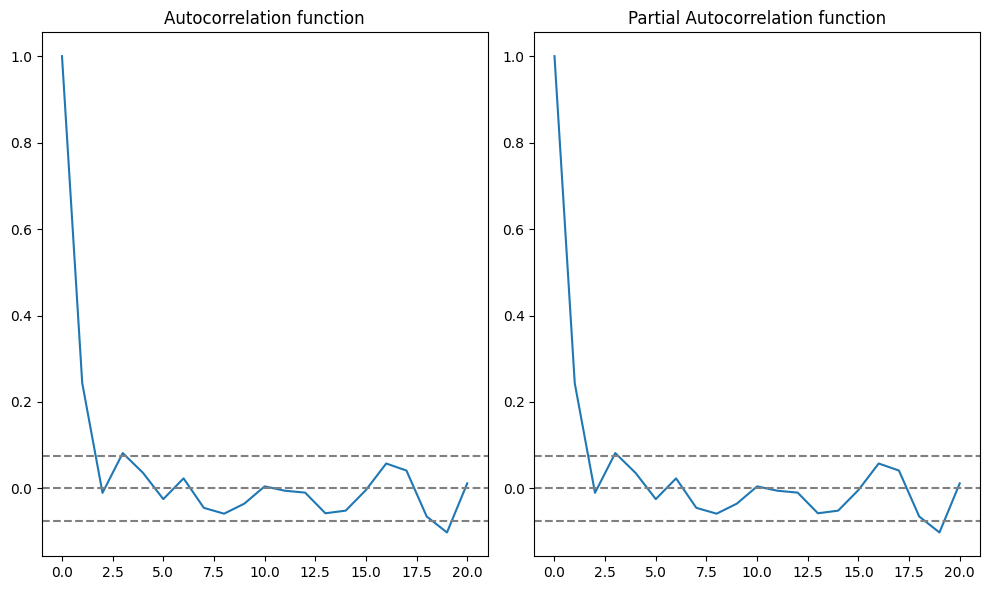

In [32]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation function')

#Plot ACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

# TRAINING ARIMA MODEL WITH NON - STATIONARY DATA

In [33]:
train_data, test_data = y_logScale[0:int(len(y_logScale)*0.75)], y_logScale[int(len(y_logScale)*0.75):]

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data, order=(2,2,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  506
Model:               SARIMAX(2, 2, 2)   Log Likelihood                1089.552
Date:                Sun, 18 Dec 2022   AIC                          -2169.104
Time:                        13:51:59   BIC                          -2147.991
Sample:                    01-10-2010   HQIC                         -2160.822
                         - 09-15-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2328      0.228     -1.021      0.307      -0.680       0.214
ar.L2          0.0077      0.084      0.092      0.927      -0.157       0.172
ma.L1         -0.4779      0.226     -2.115      0.0

C:\Users\a2z\anaconda3\envs\pga12\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
pred = fitted.get_forecast(steps=len(test_data)) # This line is for forecasting the futuristic value

In [36]:
pred.predicted_mean

2019-09-22    4.015474
2019-09-29    4.017772
2019-10-06    4.021984
2019-10-13    4.025680
2019-10-20    4.029510
                ...   
2022-11-13    4.637892
2022-11-20    4.641694
2022-11-27    4.645497
2022-12-04    4.649299
2022-12-11    4.653101
Freq: W-SUN, Name: predicted_mean, Length: 169, dtype: float64

In [37]:
ypred = pred.predicted_mean
conf = pred.conf_int(alpha=0.05)

In [38]:
lower_series = pd.Series(conf['lower Close'], index=test_data.index)
upper_series = pd.Series(conf['upper Close'], index=test_data.index)

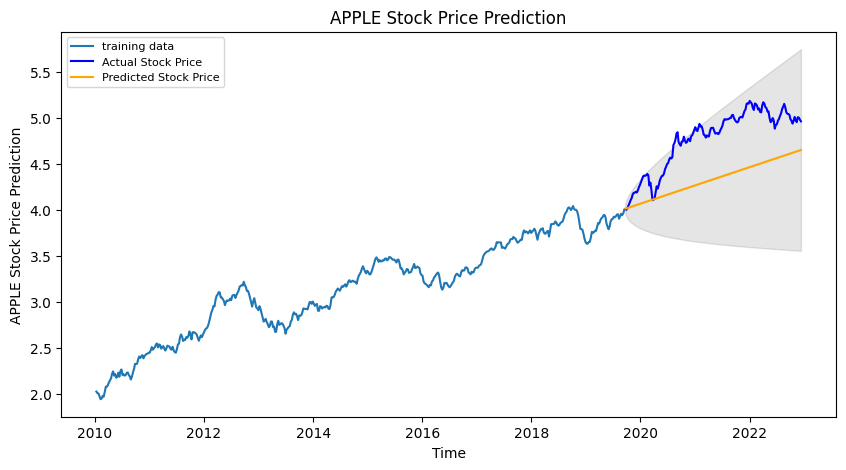

In [39]:

lower_series = pd.Series(conf['lower Close'], index=test_data.index)
upper_series = pd.Series(conf['upper Close'], index=test_data.index)
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(ypred, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data,pred.predicted_mean))
print(rmse)

0.4763631170253615


In [41]:
cols = ['Model', 'RMSE']


result_tabulation = pd.DataFrame(columns = cols)

full_metrics = pd.Series({'Model': "ARIMA WITH NON STATIONARY DATA",
                     'RMSE':rmse
                   })

result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)
result_tabulation

C:\Users\a2z\AppData\Local\Temp\ipykernel_1352\2058952663.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)


,Model,RMSE
0,ARIMA WITH NON STATIONARY DATA,0.476363


# TRAINING 2nd ORDER EXPONENTIAL SMOOTHING MODEL WITH NON - STATIONARY DATA

C:\Users\a2z\AppData\Local\Temp\ipykernel_1352\1274569721.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train_data).fit(smoothing_level=0.3,smoothing_slope=0.1)


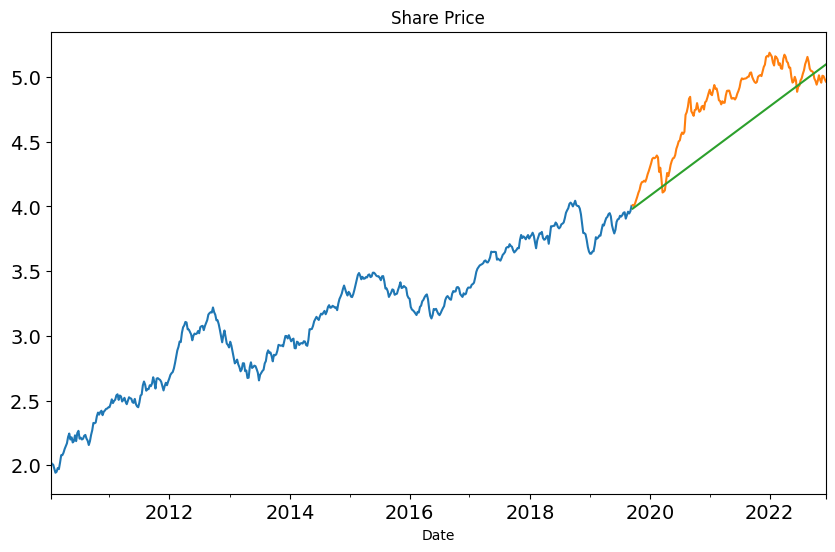

In [42]:
from statsmodels.tsa.api import Holt
Holt_df = test_data.copy()

fit1 = Holt(train_data).fit(smoothing_level=0.3,smoothing_slope=0.1)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test_data))

train_data.plot(figsize=(10,6), title= 'Share Price', fontsize=14)
test_data.plot(figsize=(10,6), title= 'Share Price', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Share Price', fontsize=14)
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data,Holt_df['Holt_linear']))
print(rmse)

0.28129426526198964


In [44]:
full_metrics = pd.Series({'Model': "2nd ORDER EXPONENTIAL SMOOTHING",
                     'RMSE':rmse
                   })

result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)
result_tabulation

C:\Users\a2z\AppData\Local\Temp\ipykernel_1352\1080064023.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)


,Model,RMSE
0,ARIMA WITH NON STATIONARY DATA,0.476363
1,2nd ORDER EXPONENTIAL SMOOTHING,0.281294


# TRAINING ARIMA MODEL WITH STATIONARY DATA

In [45]:
train_data = datasetLogDiffShifting[0:int(len(datasetLogDiffShifting)*0.75)] 
test_data = datasetLogDiffShifting[int(len(datasetLogDiffShifting)*0.75):]

plotting AR model


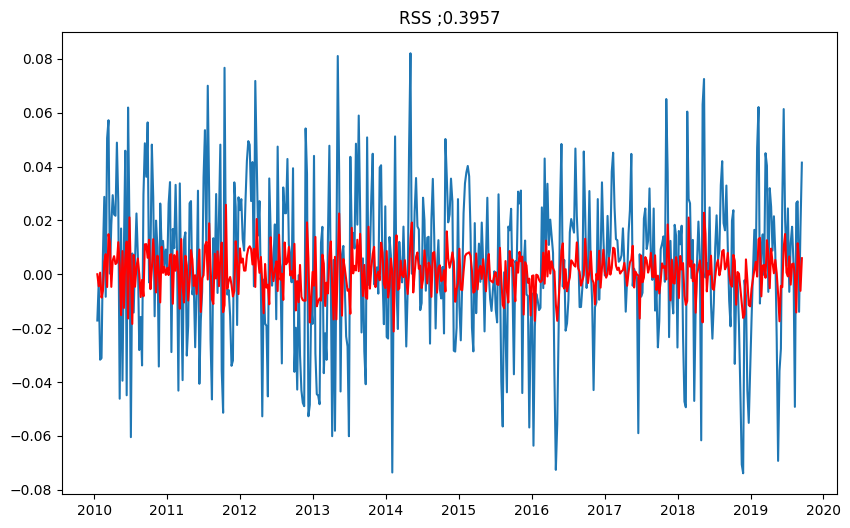

In [46]:
# from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

#AR

model = SARIMAX(train_data, order=(2,0,0))

# model = sm.tsa.arima.ARIMA(datasetLogDiffShifting, order=(2,3,2))
results_AR = model.fit()
plt.plot(train_data)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS ;%.4f'% sum((results_AR.fittedvalues-train_data.values)**2))
print('plotting AR model')

plotting MA model


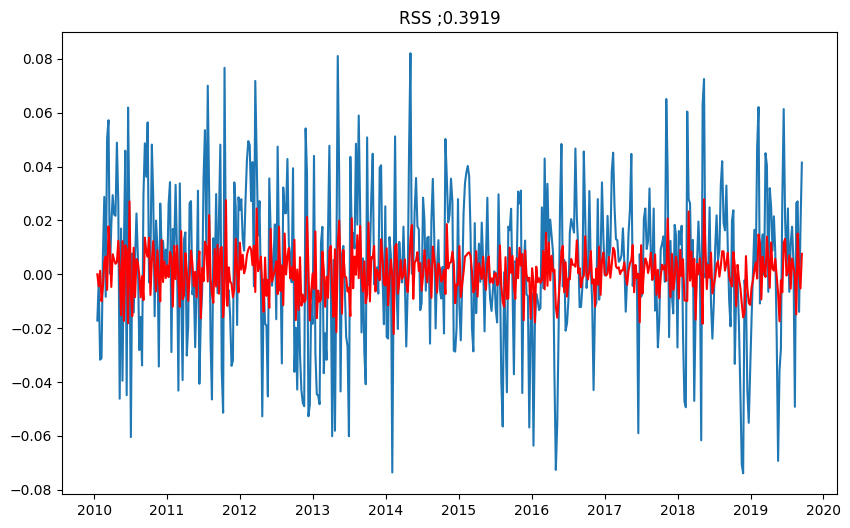

In [47]:
# from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

#MA

model = SARIMAX(train_data, order=(0,0,2))

# model = sm.tsa.arima.ARIMA(datasetLogDiffShifting, order=(2,3,2))
results_AR = model.fit()
plt.plot(train_data)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS ;%.4f'% sum((results_AR.fittedvalues-train_data.values)**2))
print('plotting MA model')

plotting AR model


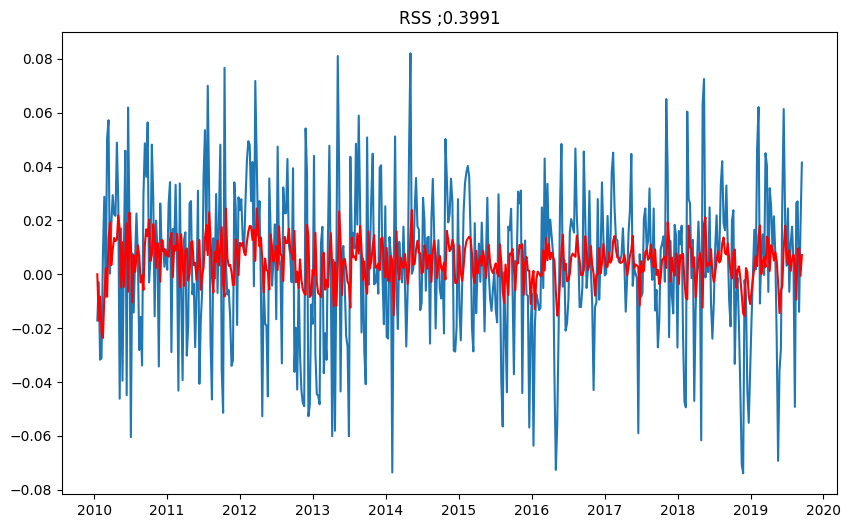

In [48]:
# from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

#AR

model = SARIMAX(train_data, order=(1,1,1))

# model = sm.tsa.arima.ARIMA(datasetLogDiffShifting, order=(2,3,2))
results_AR = model.fit()
plt.plot(train_data)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS ;%.4f'% sum((results_AR.fittedvalues-train_data.values)**2))
print('plotting AR model')

In [49]:
import pmdarima as pm

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2137.987, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2170.929, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2177.567, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2177.825, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2175.921, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2175.868, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-2177.307, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-2172.396, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2176.121, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2182.380, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2181.427, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2174.489, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2180.382, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2180.381, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0

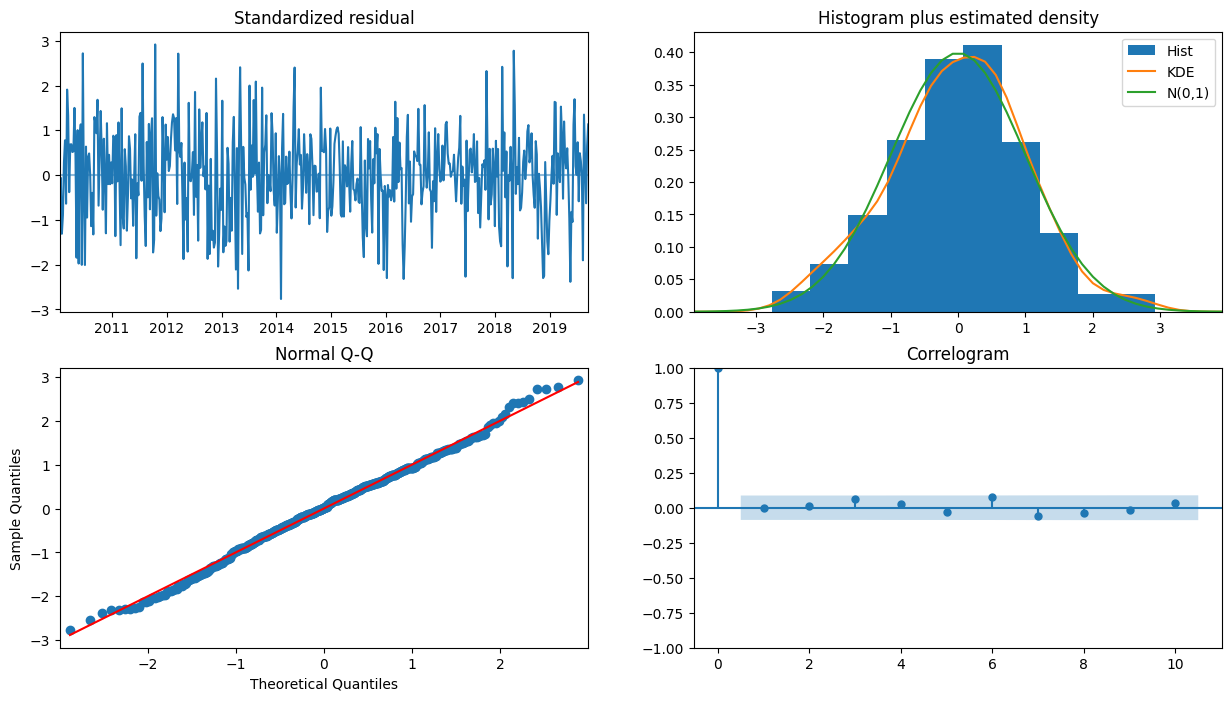

In [50]:
model_autoARIMA = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

C:\Users\a2z\anaconda3\envs\pga12\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plotting ARIMA model


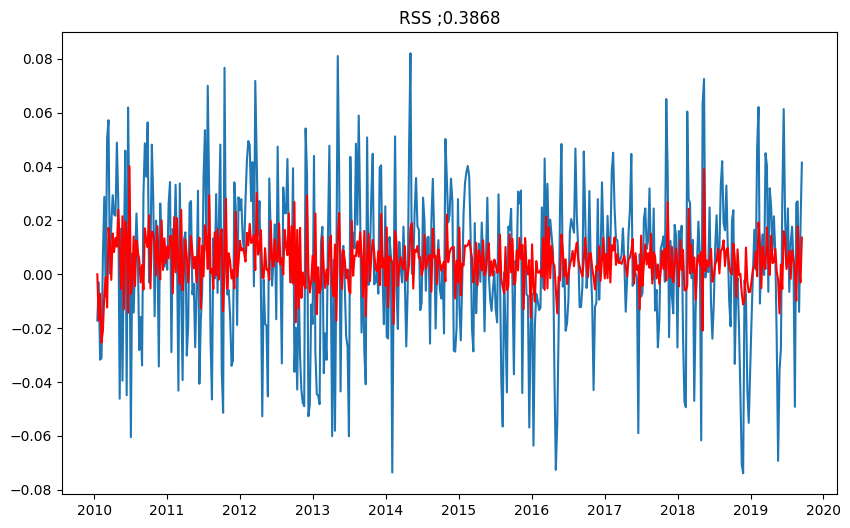

In [51]:
# from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

#AR

model = SARIMAX(train_data, order=(2,1,3))

# model = sm.tsa.arima.ARIMA(datasetLogDiffShifting, order=(2,3,2))
results_AR = model.fit()
plt.plot(train_data)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS ;%.4f'% sum((results_AR.fittedvalues-train_data.values)**2))
print('plotting ARIMA model')

In [52]:
print(len(results_AR.fittedvalues))
print(len(train_data.values))

505
505


In [53]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Date
2010-01-17    0.000000
2010-01-24   -0.017172
2010-01-31   -0.007186
2010-02-07   -0.025376
2010-02-14   -0.020876
                ...   
2019-08-18   -0.009795
2019-08-25    0.017729
2019-09-01    0.003597
2019-09-08   -0.003041
2019-09-15    0.013628
Freq: W-SUN, Length: 505, dtype: float64


In [54]:
#converts to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2010-01-17    0.000000
2010-01-24   -0.017172
2010-01-31   -0.024358
2010-02-07   -0.049734
2010-02-14   -0.070610
                ...   
2019-08-18    2.349038
2019-08-25    2.366768
2019-09-01    2.370365
2019-09-08    2.367324
2019-09-15    2.380952
Freq: W-SUN, Length: 505, dtype: float64


In [55]:
pd.Series(y_logScale.iloc[0], index=train_data.index)

Date
2010-01-17    2.026191
2010-01-24    2.026191
2010-01-31    2.026191
2010-02-07    2.026191
2010-02-14    2.026191
                ...   
2019-08-18    2.026191
2019-08-25    2.026191
2019-09-01    2.026191
2019-09-08    2.026191
2019-09-15    2.026191
Freq: W-SUN, Length: 505, dtype: float64

In [56]:
predictions_ARIMA_log = pd.Series(y_logScale.iloc[0], index=train_data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2010-01-17    2.026191
2010-01-24    2.009019
2010-01-31    2.001833
2010-02-07    1.976457
2010-02-14    1.955582
Freq: W-SUN, dtype: float64

In [57]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [58]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [59]:
train_x, test_x = y_logScale[0:int(len(y_logScale)*0.75)], y_logScale[int(len(y_logScale)*0.75):]

In [60]:
predictions_ARIMA

Date
2010-01-17     7.585143
2010-01-24     7.456000
2010-01-31     7.402615
2010-02-07     7.217130
2010-02-14     7.068030
                ...    
2019-08-18    79.458074
2019-08-25    80.879383
2019-09-01    81.170869
2019-09-08    80.924400
2019-09-15    82.034792
Freq: W-SUN, Length: 505, dtype: float64

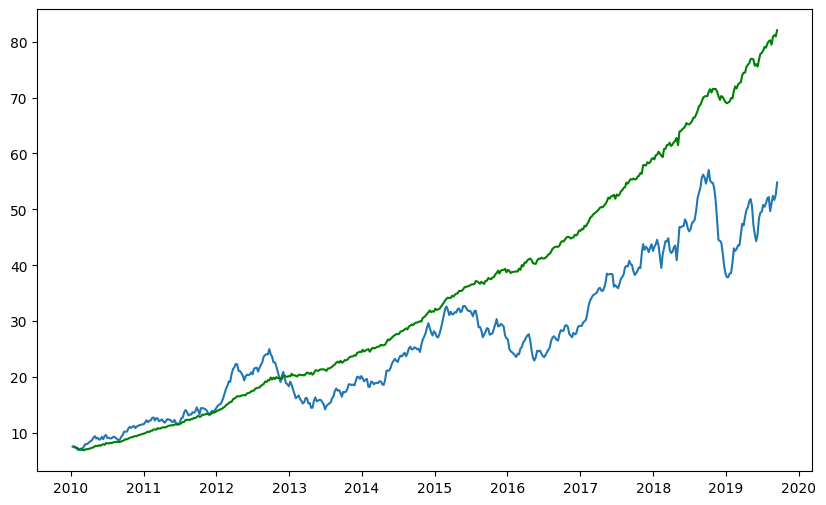

In [61]:
plt.plot(np.exp(train_x))
plt.plot(predictions_ARIMA,color='green')

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(np.exp(train_x[1:]),predictions_ARIMA))
print(rmse)

12.586536578952455


In [63]:
print(len(train_x))
print(len(test_x))
print(len(train_x)+len(test_x))

506
169
675


In [64]:
test_x

Date
2019-09-22    4.009204
2019-09-29    4.003818
2019-10-06    4.021191
2019-10-13    4.047244
2019-10-20    4.075204
                ...   
2022-11-13    4.955630
2022-11-20    5.009461
2022-11-27    5.006242
2022-12-04    4.982976
2022-12-11    4.964818
Freq: W-SUN, Name: Close, Length: 169, dtype: float64

In [65]:
pred = results_AR.predict(start=len(train_x)-1, end=len(train_x)+len(test_x)-2)
pred

2019-09-22    0.007465
2019-09-29    0.004039
2019-10-06    0.002531
2019-10-13    0.005680
2019-10-20    0.002078
                ...   
2022-11-13    0.003913
2022-11-20    0.003914
2022-11-27    0.003913
2022-12-04    0.003914
2022-12-11    0.003913
Freq: W-SUN, Name: predicted_mean, Length: 169, dtype: float64

In [66]:
# # pred1 = results_AR.get_forecast(steps=len(train_x)+len(test_x)-2)
# # pred1

# pred1 = results_AR.get_forecast(len(test_x))
# pred1.predicted_mean

In [67]:
# pred1.conf_int(alpha=0.05)

In [68]:
predictions_ARIMA_diff = pd.Series(pred, copy=True)
print(predictions_ARIMA_diff)

2019-09-22    0.007465
2019-09-29    0.004039
2019-10-06    0.002531
2019-10-13    0.005680
2019-10-20    0.002078
                ...   
2022-11-13    0.003913
2022-11-20    0.003914
2022-11-27    0.003913
2022-12-04    0.003914
2022-12-11    0.003913
Freq: W-SUN, Name: predicted_mean, Length: 169, dtype: float64


In [69]:
test_x

Date
2019-09-22    4.009204
2019-09-29    4.003818
2019-10-06    4.021191
2019-10-13    4.047244
2019-10-20    4.075204
                ...   
2022-11-13    4.955630
2022-11-20    5.009461
2022-11-27    5.006242
2022-12-04    4.982976
2022-12-11    4.964818
Freq: W-SUN, Name: Close, Length: 169, dtype: float64

In [70]:
#converts to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

2019-09-22    0.007465
2019-09-29    0.011504
2019-10-06    0.014035
2019-10-13    0.019715
2019-10-20    0.021793
                ...   
2022-11-13    0.648890
2022-11-20    0.652804
2022-11-27    0.656717
2022-12-04    0.660631
2022-12-11    0.664545
Freq: W-SUN, Name: predicted_mean, Length: 169, dtype: float64


In [71]:
predictions_ARIMA_log = pd.Series(train_x.iloc[-1], index=pred.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

2019-09-22    4.011429
2019-09-29    4.015468
2019-10-06    4.017999
2019-10-13    4.023679
2019-10-20    4.025757
                ...   
2022-11-13    4.652854
2022-11-20    4.656768
2022-11-27    4.660681
2022-12-04    4.664595
2022-12-11    4.668509
Freq: W-SUN, Length: 169, dtype: float64

In [72]:
np.exp(predictions_ARIMA_log)

2019-09-22     55.225746
2019-09-29     55.449259
2019-10-06     55.589762
2019-10-13     55.906395
2019-10-20     56.022683
                 ...    
2022-11-13    104.883892
2022-11-20    105.295197
2022-11-27    105.708070
2022-12-04    106.122605
2022-12-11    106.538725
Freq: W-SUN, Length: 169, dtype: float64

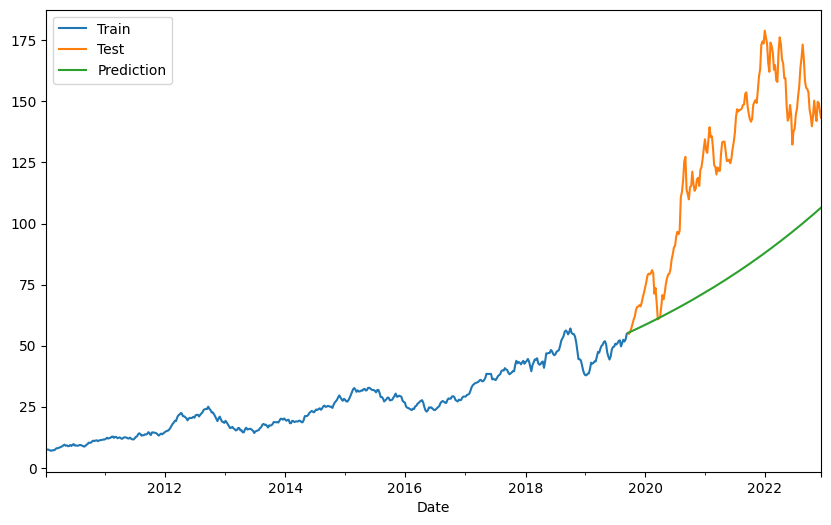

In [73]:
np.exp(train_x).plot()
np.exp(test_x).plot()
np.exp(predictions_ARIMA_log).plot()
plt.legend(["Train", "Test", "Prediction"], loc ="upper left")
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(np.exp(test_x),np.exp(predictions_ARIMA_log)))
print(rmse)

51.64079850587793


In [75]:
full_metrics = pd.Series({'Model': "ARIMA WITH STATIONARY DATA",
                     'RMSE':rmse
                   })

result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)
result_tabulation

C:\Users\a2z\AppData\Local\Temp\ipykernel_1352\1224328868.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)


,Model,RMSE
0,ARIMA WITH NON STATIONARY DATA,0.476363
1,2nd ORDER EXPONENTIAL SMOOTHING,0.281294
2,ARIMA WITH STATIONARY DATA,51.640799


In [76]:
train_data, test_data = y_logScale[0:int(len(y_logScale)*0.75)], y_logScale[int(len(y_logScale)*0.75):]

In [77]:
data = np.log(y)
data

Date
2010-01-10    2.026191
2010-01-17    2.009019
2010-01-24    2.006042
2010-01-31    1.974319
2010-02-07    1.943182
                ...   
2022-11-13    4.955630
2022-11-20    5.009461
2022-11-27    5.006242
2022-12-04    4.982976
2022-12-11    4.964818
Freq: W-SUN, Name: Close, Length: 675, dtype: float64

C:\Users\a2z\AppData\Local\Temp\ipykernel_1352\1429429928.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(data).fit(smoothing_level=0.3,smoothing_slope=0.6)


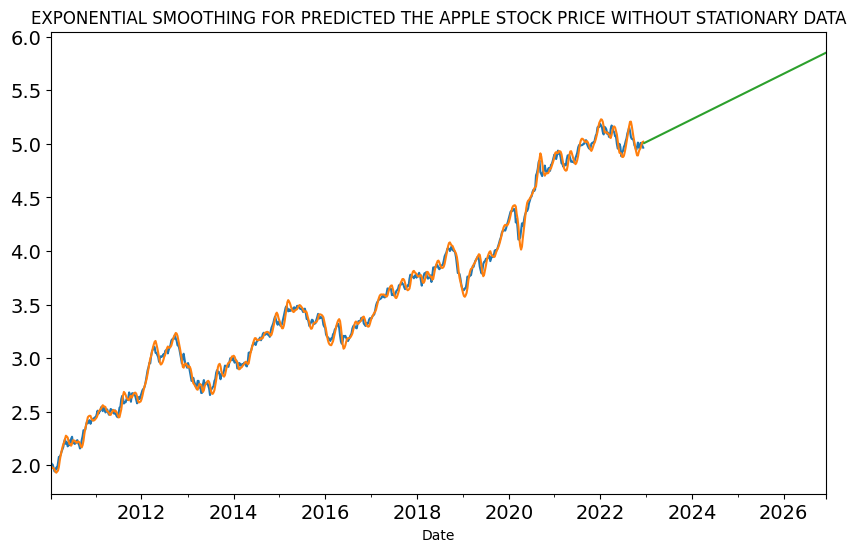

In [78]:
from statsmodels.tsa.api import Holt
Holt_df = data.copy()

fit1 = Holt(data).fit(smoothing_level=0.3,smoothing_slope=0.6)
Holt_df['Holt_linear'] = fit1.forecast(steps=208)

data.plot(figsize=(10,6), title= 'Share Price', fontsize=14)
fit1.fittedvalues.plot(figsize=(10,6), title= 'Share Price', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Share Price', fontsize=14)
plt.title("EXPONENTIAL SMOOTHING FOR PREDICTED THE APPLE STOCK PRICE WITHOUT STATIONARY DATA")
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data,fit1.fittedvalues))
print(rmse)

0.04994138756560128


In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data, order=(2,2,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  675
Model:               SARIMAX(2, 2, 2)   Log Likelihood                1413.203
Date:                Sun, 18 Dec 2022   AIC                          -2816.405
Time:                        13:52:12   BIC                          -2793.847
Sample:                    01-10-2010   HQIC                         -2807.669
                         - 12-11-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2363      0.257     -0.918      0.359      -0.741       0.268
ar.L2          0.0350      0.083      0.421      0.673      -0.128       0.198
ma.L1         -0.4875      0.252     -1.931      0.0

C:\Users\a2z\anaconda3\envs\pga12\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
predn = fitted.get_forecast(steps=102) # This line is for forecasting the futuristic value

In [82]:
ypred = predn.predicted_mean
conf = predn.conf_int(alpha=0.05)

In [83]:
lower_series = pd.Series(conf['lower Close'], index=test_data.index)
upper_series = pd.Series(conf['upper Close'], index=test_data.index)

In [84]:
ypred

2022-12-18    4.964028
2022-12-25    4.968711
2023-01-01    4.972708
2023-01-08    4.977058
2023-01-15    4.981301
                ...   
2024-10-27    5.378537
2024-11-03    5.382808
2024-11-10    5.387079
2024-11-17    5.391351
2024-11-24    5.395622
Freq: W-SUN, Name: predicted_mean, Length: 102, dtype: float64

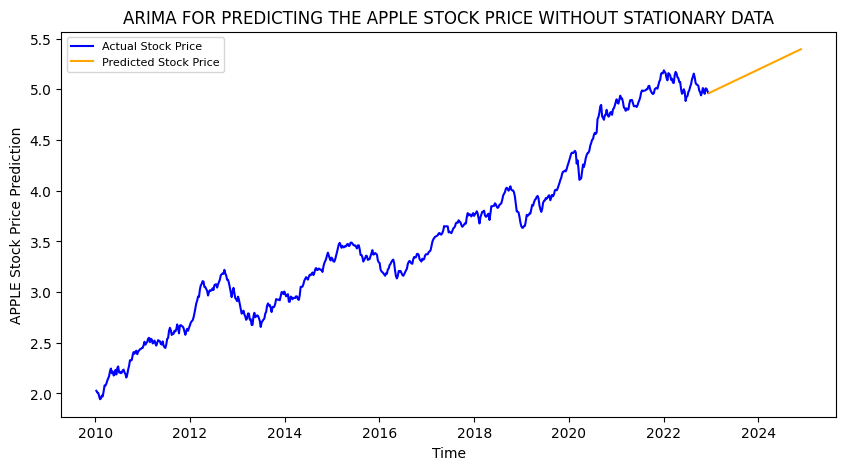

In [85]:
lower_series = pd.Series(conf['lower Close'], index=data.index)
upper_series = pd.Series(conf['upper Close'], index=data.index)
plt.figure(figsize=(10,5), dpi=100)
plt.plot(data, color = 'blue', label='Actual Stock Price')
plt.plot(ypred, color = 'orange',label='Predicted Stock Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title("ARIMA FOR PREDICTING THE APPLE STOCK PRICE WITHOUT STATIONARY DATA")
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data,fitted.fittedvalues))
print(rmse)

0.09235765260230985


C:\Users\a2z\anaconda3\envs\pga12\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plotting AR model


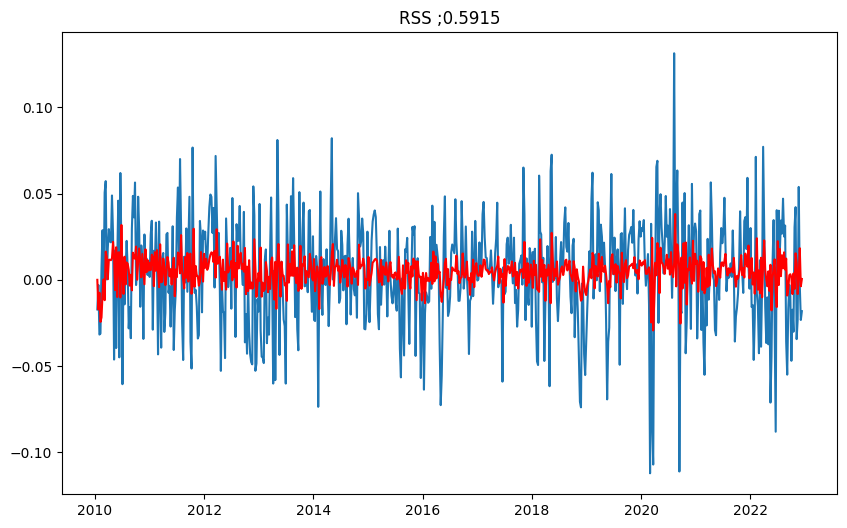

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(datasetLogDiffShifting, order=(2,1,2))

results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS ;%.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting.values)**2))
print('plotting AR model')

In [88]:
pred = results_AR.get_forecast(steps=102)

In [89]:
ypred = pred.predicted_mean
ypred

2022-12-18   -0.000649
2022-12-25    0.004701
2023-01-01    0.003836
2023-01-08    0.004112
2023-01-15    0.004038
                ...   
2024-10-27    0.004054
2024-11-03    0.004054
2024-11-10    0.004054
2024-11-17    0.004054
2024-11-24    0.004054
Freq: W-SUN, Name: predicted_mean, Length: 102, dtype: float64

In [90]:
predictions_ARIMA_diff = pd.Series(ypred, copy=True)
print(predictions_ARIMA_diff.head())

2022-12-18   -0.000649
2022-12-25    0.004701
2023-01-01    0.003836
2023-01-08    0.004112
2023-01-15    0.004038
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [91]:
#converts to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

2022-12-18   -0.000649
2022-12-25    0.004052
2023-01-01    0.007888
2023-01-08    0.012000
2023-01-15    0.016038
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [92]:
pd.Series(y_logScale.iloc[-1], index=ypred.index)

2022-12-18    4.964818
2022-12-25    4.964818
2023-01-01    4.964818
2023-01-08    4.964818
2023-01-15    4.964818
                ...   
2024-10-27    4.964818
2024-11-03    4.964818
2024-11-10    4.964818
2024-11-17    4.964818
2024-11-24    4.964818
Freq: W-SUN, Length: 102, dtype: float64

In [93]:
predictions_ARIMA_log = pd.Series(y_logScale.iloc[-1], index=ypred.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2022-12-18    4.964169
2022-12-25    4.968870
2023-01-01    4.972706
2023-01-08    4.976818
2023-01-15    4.980857
Freq: W-SUN, dtype: float64

In [94]:
np.exp(predictions_ARIMA_log)

2022-12-18    143.189534
2022-12-25    143.864207
2023-01-01    144.417180
2023-01-08    145.012267
2023-01-15    145.599035
                 ...    
2024-10-27    212.280709
2024-11-03    213.143105
2024-11-10    214.009005
2024-11-17    214.878422
2024-11-24    215.751371
Freq: W-SUN, Length: 102, dtype: float64

Text(0.5, 1.0, 'ARIMA FOR PREDICTING THE APPLE STOCK PRICE WITH STATIONARY DATA')

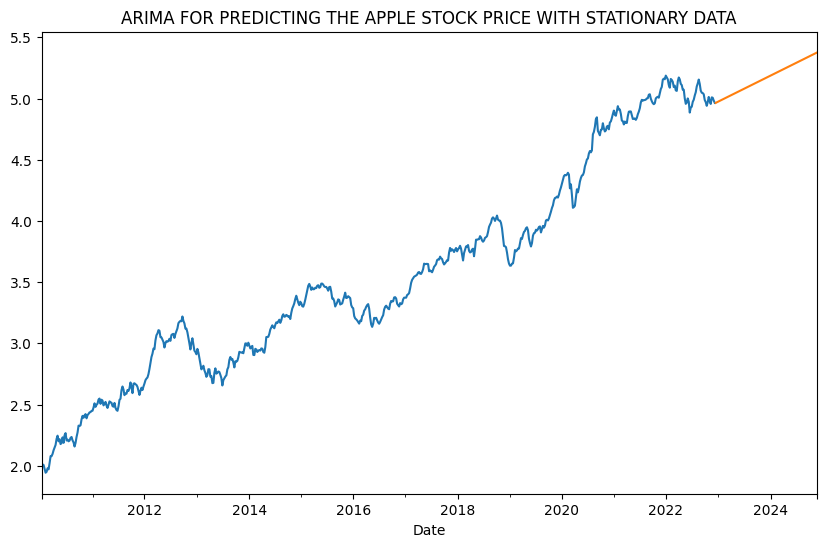

In [95]:
np.log(y).plot()
predictions_ARIMA_log.plot()
plt.title("ARIMA FOR PREDICTING THE APPLE STOCK PRICE WITH STATIONARY DATA")

### HERE WE CONCLUDE THAT WE HAVE USED SECOND ORDER EXPONENTIAL SMOOTHING FOR FORECASTING THE LONG TERM INVESTMENT GROWTH, AS THIS MODEL WAS WORKING BETTER COMPARE TO OTHER MODELS